# Introduction: Business Problem
The surprising weather conditions in Seattle is one of the most important motivations for doing this project. The weather can change drastically from sunny to rainy or snowy!
 
For this project, I employed the old accident record and its severity along with other information such as weather conditions, geographical conditions, number of pedestrians, number of injured people in car accident, time of the day, etc. I applied machine learning algorithm to predict the severity of the any future accidents based on mentioned features.
 
 
The aim of this study is to determine under which weather conditions (and other parameters) a severe accident is more likely to occur, so we can prevent the accident to be happened! In this case we can warn the drivers to avoid driving under certain conditions and use a safer road instead. 



# Data

It is a large dataset with a dimension of 193673 x 38 (37 attributes are available in this dataset). The severity data is imbalanced as 126485 rows belongs to group 1 severitycode and 58188 rows belongs to group 2. This severity column can be used to train and predict the model. Lets get some idea about the available Data as follow: 

In [399]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [364]:
df=pd.read_csv("Data-Collisions.csv")
df.head()

c:\users\rahel\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [366]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [367]:
df.shape

(194673, 38)

In [368]:
#severity code: 1: Property Damage Only Collision, 2: Injury Collision
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [369]:
#check the type of data and apply proper changes
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [370]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

# Feature Engineering
firstly we will choose the necessory features and remove the non essential features

In [371]:
pdf = df[['SEVERITYCODE','ADDRTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INCDTTM','SDOT_COLCODE','INATTENTIONIND',
             'WEATHER','ROADCOND','LIGHTCOND','PEDROWNOTGRNT','SPEEDING','ST_COLCODE']].copy(deep=True)
pdf.head()

,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,SDOT_COLCODE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE
0,2,Intersection,2,0,0,2,3/27/2013 2:54:00 PM,11,NaN,Overcast,Wet,Daylight,NaN,NaN,10
1,1,Block,2,0,0,2,12/20/2006 6:55:00 PM,16,NaN,Raining,Wet,Dark - Street Lights On,NaN,NaN,11
2,1,Block,4,0,0,3,11/18/2004 10:20:00 AM,14,NaN,Overcast,Dry,Daylight,NaN,NaN,32
3,1,Block,3,0,0,3,3/29/2013 9:26:00 AM,11,NaN,Clear,Dry,Daylight,NaN,NaN,23
4,2,Intersection,2,0,0,2,1/28/2004 8:04:00 AM,11,NaN,Raining,Wet,Daylight,NaN,NaN,10


In [372]:
pdf.dtypes

SEVERITYCODE       int64
ADDRTYPE          object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INCDTTM           object
SDOT_COLCODE       int64
INATTENTIONIND    object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
PEDROWNOTGRNT     object
SPEEDING          object
ST_COLCODE        object
dtype: object

In [373]:
# #'''Convert to Date and time'''
pdf['INCDTTM'] = pd.to_datetime(pdf['INCDTTM'])

#extraxt day, month, hour!
pdf['MONTH'] = pdf['INCDTTM'].dt.month
pdf['DAYOFWEEK'] = pdf['INCDTTM'].dt.dayofweek
pdf['HOUR'] = pdf['INCDTTM'].dt.hour

# Null Values

In [374]:
pdf.info()
pdf.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   SEVERITYCODE    194673 non-null  int64         
 1   ADDRTYPE        192747 non-null  object        
 2   PERSONCOUNT     194673 non-null  int64         
 3   PEDCOUNT        194673 non-null  int64         
 4   PEDCYLCOUNT     194673 non-null  int64         
 5   VEHCOUNT        194673 non-null  int64         
 6   INCDTTM         194673 non-null  datetime64[ns]
 7   SDOT_COLCODE    194673 non-null  int64         
 8   INATTENTIONIND  29805 non-null   object        
 9   WEATHER         189592 non-null  object        
 10  ROADCOND        189661 non-null  object        
 11  LIGHTCOND       189503 non-null  object        
 12  PEDROWNOTGRNT   4667 non-null    object        
 13  SPEEDING        9333 non-null    object        
 14  ST_COLCODE      194655 non-null  obj

SEVERITYCODE           0
ADDRTYPE            1926
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDTTM                0
SDOT_COLCODE           0
INATTENTIONIND    164868
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SPEEDING          185340
ST_COLCODE            18
MONTH                  0
DAYOFWEEK              0
HOUR                   0
dtype: int64

In [375]:
'''fill the null values with mode of each feature'''
pdf['SPEEDING']=pdf['SPEEDING'].fillna('N')   #NAN value is N
pdf['PEDROWNOTGRNT']=pdf['PEDROWNOTGRNT'].fillna('N')   #NAN value is N
pdf['INATTENTIONIND']=pdf['INATTENTIONIND'].fillna('N') #NAN value is N

In [376]:
pdf.isnull().sum()

SEVERITYCODE         0
ADDRTYPE          1926
PERSONCOUNT          0
PEDCOUNT             0
PEDCYLCOUNT          0
VEHCOUNT             0
INCDTTM              0
SDOT_COLCODE         0
INATTENTIONIND       0
WEATHER           5081
ROADCOND          5012
LIGHTCOND         5170
PEDROWNOTGRNT        0
SPEEDING             0
ST_COLCODE          18
MONTH                0
DAYOFWEEK            0
HOUR                 0
dtype: int64

In [351]:
#to simplicity we will fill other Nan value with mode value:
Nanfeatures=['ADDRTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE']
for i in Nanfeatures:
    pdf[i]=pdf[i].fillna(pdf[i].mode().iloc[0])

pdf.isnull().sum()

SEVERITYCODE      0
ADDRTYPE          0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
INCDTTM           0
SDOT_COLCODE      0
INATTENTIONIND    0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
PEDROWNOTGRNT     0
SPEEDING          0
ST_COLCODE        0
MONTH             0
DAYOFWEEK         0
HOUR              0
dtype: int64

# Visualization

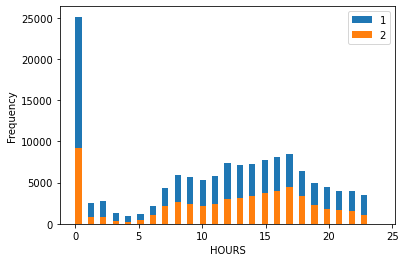

In [353]:
pdf.groupby('SEVERITYCODE')['HOUR'].plot(kind='hist',bins=np.linspace(0,24,50),legend=True)
plt.xlabel("HOURS")
plt.show()

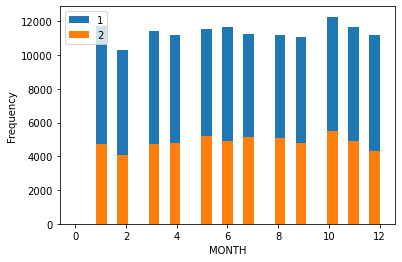

In [354]:
pdf.groupby('SEVERITYCODE')['MONTH'].plot(kind='hist',bins=np.linspace(0,12,30), legend=True)
plt.xlabel("MONTH")
plt.show()

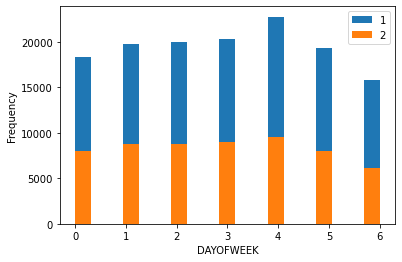

In [355]:
pdf.groupby('SEVERITYCODE')['DAYOFWEEK'].plot(kind='hist',bins=np.linspace(0,6,20), legend=True)
plt.xlabel("DAYOFWEEK")
plt.show()

The most frequent accidents occurred between 7 am to 7 pm. But we can not say anything about the relation of accidents with  Month and dayof week

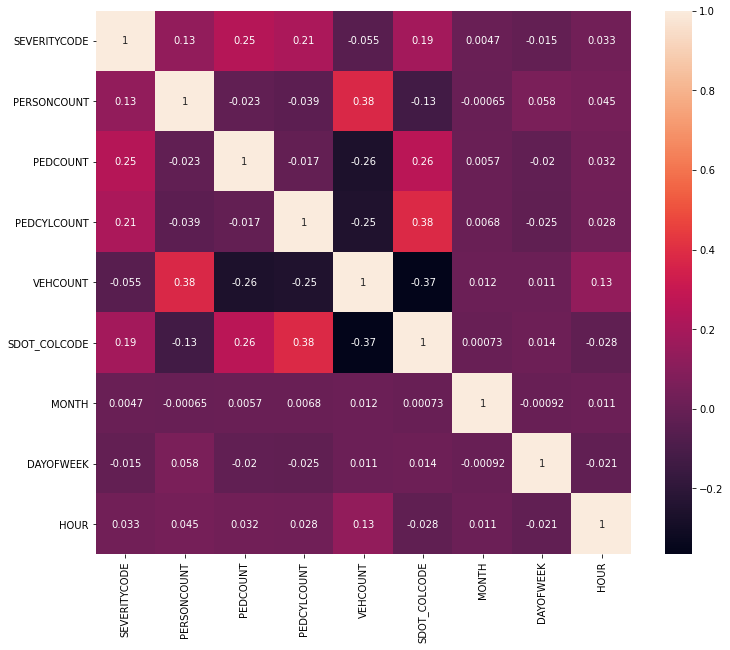

In [356]:
plt.figure(figsize=(12,10))
fig=sns.heatmap(pdf.corr(), annot=True)


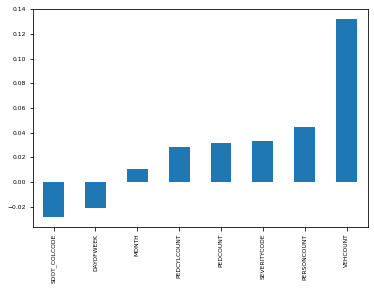

In [357]:
pdf.corr()['HOUR'].sort_values()[:-1].plot(kind='bar', fontsize=6)  

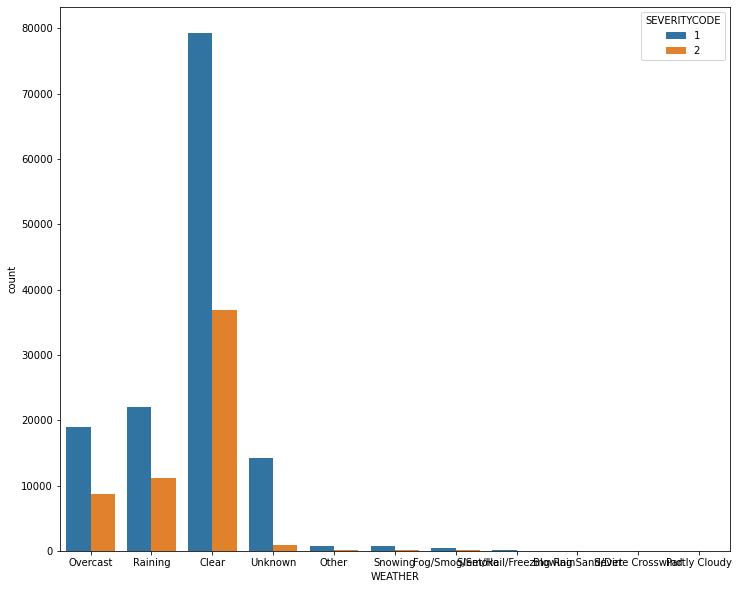

In [359]:
plt.figure(figsize=(12,10))

sns.countplot(x='WEATHER', hue='SEVERITYCODE', data=pdf)

# Categorical Features

In [377]:
pdf.head()

,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,SDOT_COLCODE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,MONTH,DAYOFWEEK,HOUR
0,2,Intersection,2,0,0,2,2013-03-27 14:54:00,11,N,Overcast,Wet,Daylight,N,N,10,3,2,14
1,1,Block,2,0,0,2,2006-12-20 18:55:00,16,N,Raining,Wet,Dark - Street Lights On,N,N,11,12,2,18
2,1,Block,4,0,0,3,2004-11-18 10:20:00,14,N,Overcast,Dry,Daylight,N,N,32,11,3,10
3,1,Block,3,0,0,3,2013-03-29 09:26:00,11,N,Clear,Dry,Daylight,N,N,23,3,4,9
4,2,Intersection,2,0,0,2,2004-01-28 08:04:00,11,N,Raining,Wet,Daylight,N,N,10,1,2,8


In [378]:
#yes or No to 1/0
Catfeatures_yn=['SPEEDING', 'PEDROWNOTGRNT', 'INATTENTIONIND']
cat_num_dic={'N':0, 'Y':1}
             
for i in Catfeatures_yn:
    pdf[i] = pdf[i].map(cat_num_dic).astype('float')
pdf.head()

,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,SDOT_COLCODE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,MONTH,DAYOFWEEK,HOUR
0,2,Intersection,2,0,0,2,2013-03-27 14:54:00,11,0.0,Overcast,Wet,Daylight,0.0,0.0,10,3,2,14
1,1,Block,2,0,0,2,2006-12-20 18:55:00,16,0.0,Raining,Wet,Dark - Street Lights On,0.0,0.0,11,12,2,18
2,1,Block,4,0,0,3,2004-11-18 10:20:00,14,0.0,Overcast,Dry,Daylight,0.0,0.0,32,11,3,10
3,1,Block,3,0,0,3,2013-03-29 09:26:00,11,0.0,Clear,Dry,Daylight,0.0,0.0,23,3,4,9
4,2,Intersection,2,0,0,2,2004-01-28 08:04:00,11,0.0,Raining,Wet,Daylight,0.0,0.0,10,1,2,8


In [379]:
'''Dummy variables'''
Catfeatures=['ADDRTYPE', 'WEATHER','ROADCOND', 'LIGHTCOND']
pdf=pd.get_dummies(pdf, columns=Catfeatures, drop_first=True)


In [380]:
pdf.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,SDOT_COLCODE,INATTENTIONIND,PEDROWNOTGRNT,SPEEDING,...,ROADCOND_Unknown,ROADCOND_Wet,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,2,2,0,0,2,2013-03-27 14:54:00,11,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
1,1,2,0,0,2,2006-12-20 18:55:00,16,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,0
2,1,4,0,0,3,2004-11-18 10:20:00,14,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,1,3,0,0,3,2013-03-29 09:26:00,11,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,2,2,0,0,2,2004-01-28 08:04:00,11,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0


In [381]:
pdf.dtypes

SEVERITYCODE                                   int64
PERSONCOUNT                                    int64
PEDCOUNT                                       int64
PEDCYLCOUNT                                    int64
VEHCOUNT                                       int64
INCDTTM                               datetime64[ns]
SDOT_COLCODE                                   int64
INATTENTIONIND                               float64
PEDROWNOTGRNT                                float64
SPEEDING                                     float64
ST_COLCODE                                    object
MONTH                                          int64
DAYOFWEEK                                      int64
HOUR                                           int64
ADDRTYPE_Block                                 uint8
ADDRTYPE_Intersection                          uint8
WEATHER_Clear                                  uint8
WEATHER_Fog/Smog/Smoke                         uint8
WEATHER_Other                                 

In [391]:
#for colcode
# pdf['ST_COLCODE'].replace(to_replace=' ', value=np.nan,inplace=True)
pdf['ST_COLCODE'].fillna(method='ffill', inplace = True)
pdf['ST_COLCODE']=pdf['ST_COLCODE'].astype(dtype='float')


In [392]:
pdf.dtypes

SEVERITYCODE                                   int64
PERSONCOUNT                                    int64
PEDCOUNT                                       int64
PEDCYLCOUNT                                    int64
VEHCOUNT                                       int64
INCDTTM                               datetime64[ns]
SDOT_COLCODE                                   int64
INATTENTIONIND                               float64
PEDROWNOTGRNT                                float64
SPEEDING                                     float64
ST_COLCODE                                   float64
MONTH                                          int64
DAYOFWEEK                                      int64
HOUR                                           int64
ADDRTYPE_Block                                 uint8
ADDRTYPE_Intersection                          uint8
WEATHER_Clear                                  uint8
WEATHER_Fog/Smog/Smoke                         uint8
WEATHER_Other                                 

# Machine Learning

Since it is a binary classification, I will use decision tree classifier which is very fast for latge set of data. 

In [418]:
features=pdf.drop(['SEVERITYCODE','INCDTTM', 'MONTH', 'DAYOFWEEK'], axis=1)
labels=pdf[['SEVERITYCODE']]

In [419]:
'''normalized data'''
features_n = MinMaxScaler(feature_range = (0, 1)).fit(features).transform(features)  #Array
features=pd.DataFrame(features_n, columns=features.columns) #dataframe
#Althiogh it makes more scence to fit on train data and then transform for all train, test, validation data.

In [420]:
'''split data'''
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

for dataset in [y_train, y_test]:
    print(round(len(dataset)/len(labels),2))

0.8
0.2


In [421]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [422]:
yhat= dt.predict(X_test)


In [423]:
f1_test = f1_score(y_test,yhat)
print("the f1 score of the dt model is --> ",f1_test)

the f1 score of the dt model is -->  0.8194601252181053


In [424]:
f1_train= f1_score(y_train,dt.predict(X_train))
print("the f1 score of the dt model is --> ",f1_train)

the f1 score of the dt model is -->  0.8934533979044365


In [425]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

print(classification_report(y_test, yhat))
print(confusion_matrix(y_test, yhat))

              precision    recall  f1-score   support

           1       0.77      0.87      0.82     27424
           2       0.56      0.38      0.46     11511

    accuracy                           0.73     38935
   macro avg       0.67      0.63      0.64     38935
weighted avg       0.71      0.73      0.71     38935

[[23952  3472]
 [ 7082  4429]]


# Results and Discussion

In this study we employed a Decisiontree classifier method to predict the severity of the accidents based on some other features such as weather conditions, road condition, time or the day, and so on. Results showed that the f1 score for the train data is 0.89 which decreases to 0.81 for the test data. As a result, the model performed well to predict the severity of the accidents with high accuracy. Thus, the Proper warning can be send to drivers ahead of time to prevent possible accidents.



# Conclusion
The aim of this project was to get hands on experience on various phase of the data science projects such as business undrestanding, data undrestanding, data prepration, modeling, evaluation, and deployment.